### Примеры

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show();

#### Вычисления характеристик:

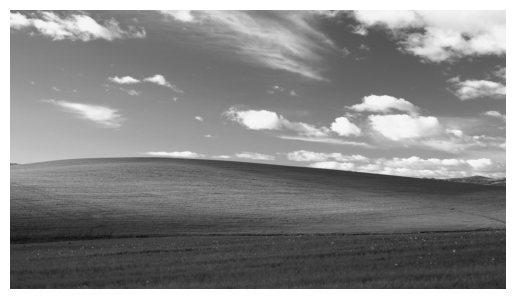

In [2]:
img = cv2.imread('pictures/bliss.jpg', 0)
imgshow(img)

ret, thresh = cv2.threshold(img, 0, 255, 0)
# Все контуры изображения
contours, hierarchy = cv2.findContours(thresh, 5, 5)
# создание массива точек контура
cnt = contours[0]

#### 3.1.1. Площадь, ограниченная контуром

In [3]:
area = cv2.contourArea(cnt)
area

2070601.0

#### 3.1.2. Длина контурного периметра


In [4]:
cv2.arcLength(cnt, 1)

5996.0

#### 3.1.3. Моменты

In [5]:
print(cv2.moments(cnt))

{'m00': 2070601.0, 'm10': 1986741659.5, 'm01': 1117089239.5, 'm20': 2541704829720.333, 'm11': 1071847125300.25, 'm02': 803559526280.3333, 'm30': 3658148676174907.5, 'm21': 1371249755634119.8, 'm12': 771015365465979.8, 'm03': 650280546642359.9, 'mu20': 635426207430.0833, 'mu11': 0.0, 'mu02': 200889881570.08325, 'mu30': -81.5, 'mu21': 0.1875, 'mu12': 0.03125, 'mu03': 0.25, 'nu20': 0.14820821748532587, 'nu11': 0.0, 'nu02': 0.046856001389612614, 'nu30': -1.3210418016702896e-14, 'nu21': 3.039206598934715e-17, 'nu12': 5.065344331557859e-18, 'nu03': 4.052275465246287e-17}


#### 3.1.4. Отношение ширины к высоте ограничивающего прямоугольника

In [6]:
x, y, w, h = cv2.boundingRect(cnt)
float(w)/h

1.7777777777777777

#### 3.1.5. Отношение площади контура к площади ограничивающего прямоугольника


In [7]:
arr = w * h
ar = cv2.contourArea(cnt)
extent = float(arr) / ar
extent

1.0014483717529354

#### 3.1.6. Эквивалентный диаметр


In [8]:
ar = cv2.contourArea(cnt)
eqdiam = np.sqrt(4*ar / np.pi)
eqdiam

1623.69057229762

### Задание 3.1. 
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

(-0.5, 1919.5, 1079.5, -0.5)

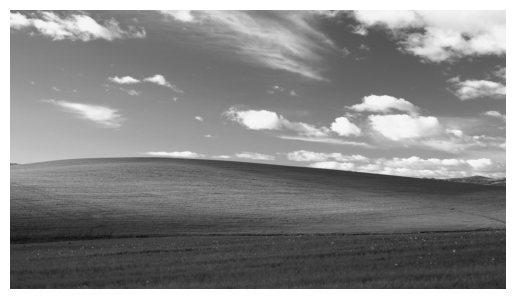

In [9]:
img = cv2.imread('pictures/bliss.jpg',0)
imag = cv2.imread('pictures/bliss.jpg',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

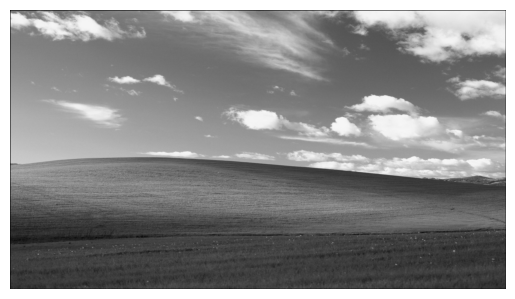

In [10]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
# Создание контура
cnt = contours[0]
# Вычисление площади
s = cv2.contourArea(cnt)
# Вычисление периметра
p = cv2.arcLength(cnt, True)
# Вычисление моментов
M = cv2.moments(cnt)
# Приблизительный прямоугольник вокруг бинарного изображения (рамка)
x, y, w, h = cv2.boundingRect(cnt)

imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
imgshow(imag)

In [11]:
asprat_ratio = float(w) / h # соотношение сторон
rectar = w * h
s_ratio = float(s) / rectar
eqdiam = np.sqrt(4*ar / np.pi)

print("Площадь s: ", s)
print("Периметр p: ", p)
print("Моменты M: ", M)
print("x, y, w, h: ", x, y, w, h)
print(f"Ширина w: {w}, Высота h: {h}")
print(f"Отношение ширины к высоте w/h: {asprat_ratio}")
print("Отношение s/(wh): ", s_ratio)
print("Эквивалентный диаметр: ", eqdiam)

Площадь s:  2070601.0
Периметр p:  5996.0
Моменты M:  {'m00': 2070601.0, 'm10': 1986741659.5, 'm01': 1117089239.5, 'm20': 2541704829720.333, 'm11': 1071847125300.25, 'm02': 803559526280.3333, 'm30': 3658148676174907.5, 'm21': 1371249755634119.8, 'm12': 771015365465979.8, 'm03': 650280546642359.9, 'mu20': 635426207430.0833, 'mu11': 0.0, 'mu02': 200889881570.08325, 'mu30': -81.5, 'mu21': 0.1875, 'mu12': 0.03125, 'mu03': 0.25, 'nu20': 0.14820821748532587, 'nu11': 0.0, 'nu02': 0.046856001389612614, 'nu30': -1.3210418016702896e-14, 'nu21': 3.039206598934715e-17, 'nu12': 5.065344331557859e-18, 'nu03': 4.052275465246287e-17}
x, y, w, h:  0 0 1920 1080
Ширина w: 1920, Высота h: 1080
Отношение ширины к высоте w/h: 1.7777777777777777
Отношение s/(wh):  0.9985537229938272
Эквивалентный диаметр:  1623.69057229762


#### 3.2.1. Маска и пиксельные точки

In [12]:
img = cv2.imread("pictures/bliss.jpg", 0)
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoints = np.transpose(np.nonzero(mask))
pixpoints = cv2.findNonZero(mask)

#### 3.2.2. Максимальное и минимальное значения и их координаты

In [13]:
minval, maxval, minloc, maxloc = cv2.minMaxLoc(img, mask=mask)
print(minval, maxval, minloc, maxloc)

2.0 252.0 (1597, 860) (1783, 582)


#### 3.2.3. Крайние точки

In [14]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
print(leftmost, rightmost, topmost, bottommost)

(0, 0) (1919, 0) (0, 0) (1919, 1079)


#### 3.2.4. Средняя интенсивность

In [15]:
mean_val = cv2.mean(img, mask=mask)
mean_val

(123.72932773919753, 0.0, 0.0, 0.0)

#### 3.2.5. Ориентация

In [16]:
img = cv2.imread('pictures/bliss.jpg', 0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]
(x, y), (MA, ma), ang = cv2.fitEllipse(cnt)
print(ang)

180.0


### Задание 3.2. 
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

(-0.5, 1919.5, 1079.5, -0.5)

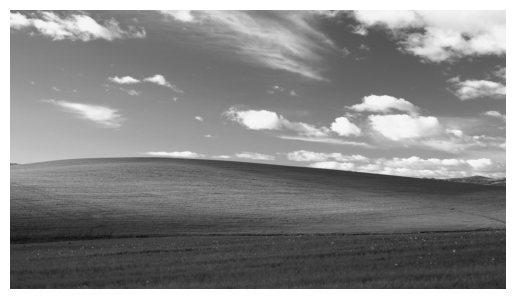

In [17]:
img = cv2.imread('pictures/bliss.jpg',0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [18]:
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

# Крайние точки
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

print(f"Пиксельные точки:\n {pixpoin}")
print(f"Максимальное и минимальное значения и их координаты: {minv}, {maxv}, {minl}, {maxl}")
print(f"Крайние точки: {leftmost}, {rightmost}, {topmost}, {bottommost}")
print(f"Средняя интенсивность: {meanv}")
print(f"Ориентация: {ang}")

Пиксельные точки:
 [[   0    0]
 [   0    1]
 [   0    2]
 ...
 [1079 1917]
 [1079 1918]
 [1079 1919]]
Максимальное и минимальное значения и их координаты: 2.0, 252.0, (1597, 860), (1783, 582)
Крайние точки: (0, 0), (1919, 0), (0, 0), (1919, 1079)
Средняя интенсивность: (123.72932773919753, 0.0, 0.0, 0.0)
Ориентация: 180.0
